<a href="https://colab.research.google.com/github/abinashbordoloi/MyColabWork/blob/main/IITM_CCBR/Solution_of_ML_questions_ABINASH_BORDOLOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an exercise notebook for selection of candidates in Centre for Computational Brain Research (CCBR), IIT Madras

##(c) 2024 CCBR

---

Name:Abinash Bordoloi, Email:abinashbordoloi07@gmail.com or iteratex.pseudocode@gmail.com, IITM-Student-email: 21f2000278@ds.study.iitm.ac.in,Phone no: +91-7578040598, Diploma IITM BS Program/Also Final Year BTech Student at Gauhati University Institute of Science and Tenchnology

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

# **Task 1**

In [12]:
# Run this to clone the repo for data and images

!git clone https://github.com/Sambhav226/Datasets-and-Images.git

Cloning into 'Datasets-and-Images'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 23.31 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**1. We have given you a csv file called placements which contains some information of students regarding their placements. Your task is to make a multiple linear regressoin class of your own and predict and give the r2 score for the test data.**

**The percentage of data to split into training and testing is predefined to be test_size = 0.2**

**Or you can use the following code snippet to split the data**

*x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)*

In [54]:
from sklearn.model_selection import train_test_split
import numpy as np
data = np.loadtxt('/content/Datasets-and-Images/Datasets and images/placement.csv', delimiter = ",", skiprows = 1)

x = data[:,:-1]
y = data[:,-1]
# print(x)

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [55]:

import numpy as np

class NewLR:

  def __init__(self):
      self.coef_ = None
      self.intercept_ = None

  def fit(self,x_train,y_train):
    x_train = np.insert(x_train,0,1,axis=1)
    # Calculate the coeff
    # Calculate coefficients using closed-form solution (e.g., np.linalg.inv)
    self.coef_ = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
    self.intercept_ = self.coef_[0]  # Extract bias term
    self.coef_ = self.coef_[1:]

    x_train = np.vstack((np.ones(x_train.shape[0]), x_train.T)).T

  def predict(self, x_test):
    X_test = np.insert(x_test, 0, 1, axis=1)  # Add column of ones for bias
    y_pred = x_test @ self.coef_ + self.intercept_  # Calculate predictions
    return y_pred



In [56]:
# Use the NewLR to generate y_pred below

model = NewLR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7807301475103857

# **Task 2**

**2. You have to create a new class called GDRegressor, which will be a gradient descent class. You have to use that class to predict the y value of a simple linear regression dataset generated randomly**

**The code snippet is given below use that to get started**

In [58]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.16404017]
-2.7130725669241036


In [61]:
# len(y)

100

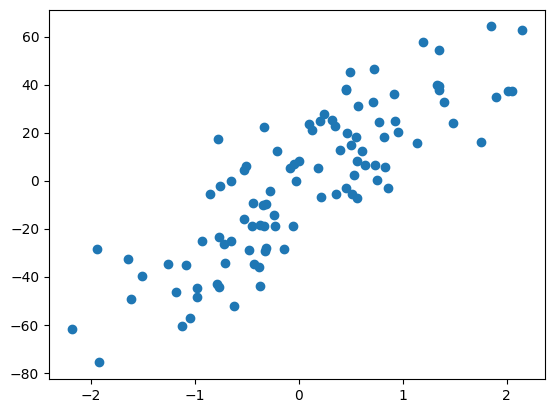

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [72]:
import numpy as np

class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = 100
        self.b = -120



    def fit(self,X,y):
      # calcualte the b using GD

      n = len(X)

      for i in range(self.epochs):
        y_predicted = self.m * X.ravel() + self.b

        cost = (1) * np.sum((y - y_predicted) ** 2)
        md = -(2) * np.sum(X.ravel() * (y - y_predicted))
        bd = -(2) * np.sum(y - y_predicted)
        self.m = self.m -( self.learning_rate * md)
        self.b = self.b - ( self.learning_rate * bd)
        print(f'Epoch {i+ 1}, Cost: {cost:.4f}, m: {self.m:.4f}, b: {self.b:.4f}')



      print("------------------------------------------------------")
      print("Final value of slope a and bias term b are:")
      print(self.m,self.b)

    def predict(self,X):


      return self.m * X + self.b




In [73]:
# Use the GDRegressor class to predict y_pred below
learning_rate = 0.001
epochs = 50
gd = GDRegressor(learning_rate, epochs)
gd.fit(X_train,y_train)




Epoch 1, Cost: 1450169.7942, m: 90.4076, b: -101.5143
Epoch 2, Cost: 1049515.4378, m: 82.0851, b: -85.9488
Epoch 3, Cost: 761690.6361, m: 74.8662, b: -72.8414
Epoch 4, Cost: 554793.9739, m: 68.6061, b: -61.8030
Epoch 5, Cost: 405978.3976, m: 63.1787, b: -52.5063
Epoch 6, Cost: 298872.0200, m: 58.4744, b: -44.6760
Epoch 7, Cost: 221736.1495, m: 54.3976, b: -38.0801
Epoch 8, Cost: 166149.1419, m: 50.8655, b: -32.5237
Epoch 9, Cost: 126065.4729, m: 47.8058, b: -27.8425
Epoch 10, Cost: 97142.6982, m: 45.1559, b: -23.8984
Epoch 11, Cost: 76259.7670, m: 42.8614, b: -20.5750
Epoch 12, Cost: 61172.0918, m: 40.8749, b: -17.7744
Epoch 13, Cost: 50264.4080, m: 39.1554, b: -15.4142
Epoch 14, Cost: 42373.5954, m: 37.6673, b: -13.4249
Epoch 15, Cost: 36661.5828, m: 36.3795, b: -11.7481
Epoch 16, Cost: 32524.1235, m: 35.2654, b: -10.3345
Epoch 17, Cost: 29525.2782, m: 34.3017, b: -9.1428
Epoch 18, Cost: 27350.3330, m: 33.4681, b: -8.1380
Epoch 19, Cost: 25771.9426, m: 32.7472, b: -7.2907
Epoch 20, Co

In [74]:
y_pred = gd.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6184348252119185

In [ ]:
len(y_pred)

20

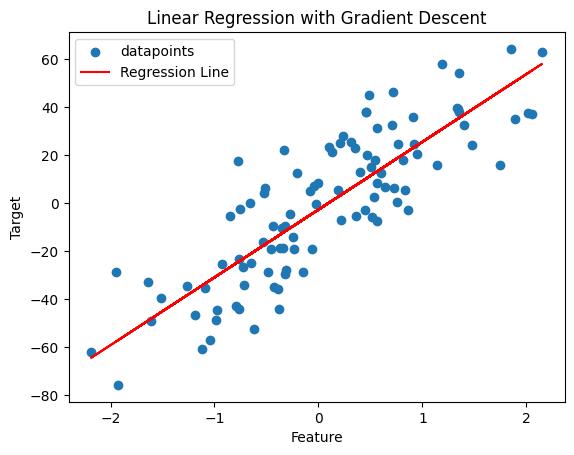

In [75]:
plt.scatter(X, y, label = "datapoints")
plt.plot(X, gd.predict(X), color='red', label="Regression Line")  # Predict using the fitted model
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# **Task 3**

**You have to use Polynomial logistic regression class and get the accuracy score of more than 0.75 and also plot the decision boundary in the following**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [77]:
df = pd.read_csv('/content/Datasets-and-Images/Datasets and images/iris.csv')

In [78]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
54,6.5,2.8,4.6,1.5,versicolor
72,6.3,2.5,4.9,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica
13,4.3,3.0,1.1,0.1,setosa


In [79]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
X = df.iloc[:,0:4].values
y = df.iloc[:,-1].values


In [81]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the target variable
y_encoded = le.fit_transform(y)

# Display class mappings
class_mappings = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class mappings:", class_mappings)

Class mappings: {'setosa': 0, 'versicolor': 1, 'virginica': 2}


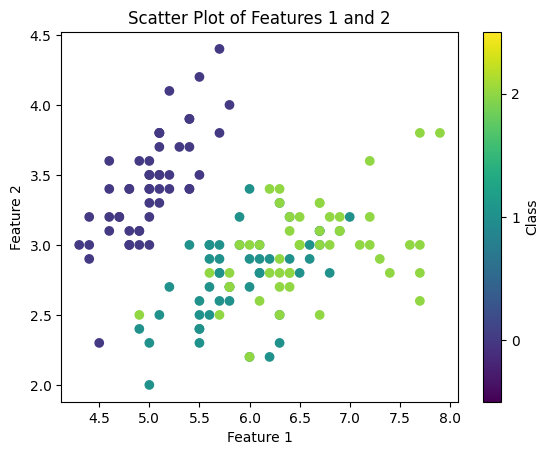

In [82]:
# Use only the first two features for plotting
X_plot = X[:, [0, 1]]

# Scatter plot of the first two features
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.colorbar(ticks=range(len(le.classes_)), label='Class')
plt.clim(-0.5, len(le.classes_)-0.5)
plt.show()



In [32]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.0 MB/s eta 0:00:00


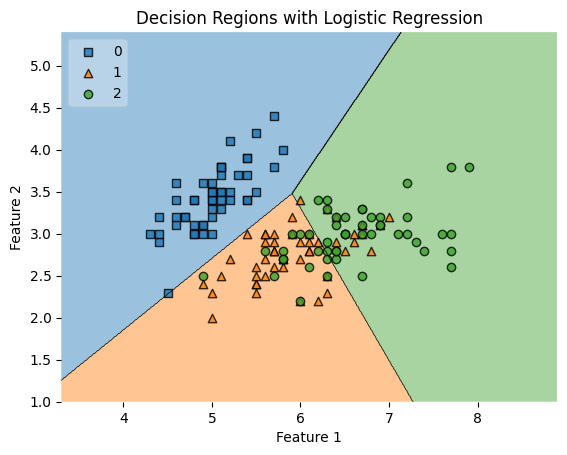

In [83]:
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

# Fit the logistic regression model using the first two features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_plot, y_encoded)

# Plot the decision regions using the first two features
plot_decision_regions(X_plot, y_encoded, clf=clf, legend=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions with Logistic Regression')
plt.show()

In [84]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_poly, y)

    accuracy = np.mean(cross_val_score(clf, X_poly, y, scoring='accuracy', cv=10))
    print(f'Accuracy with polynomial degree {degree}: {accuracy:.2f}')

    # Create mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary with Polynomial Degree {degree}')
    plt.show()

Accuracy with polynomial degree 1: 0.81


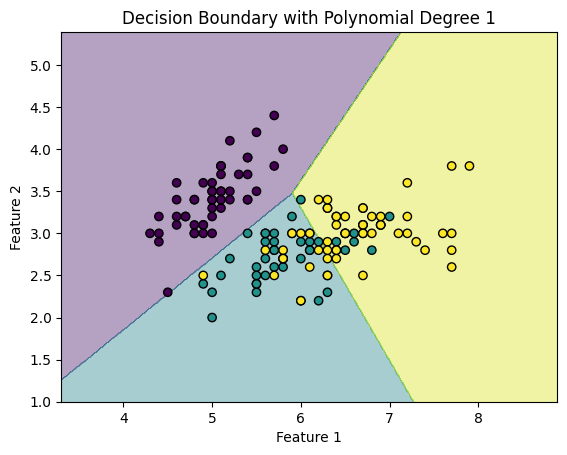

Highest Accuracy: 0.8066666666666669


In [88]:
accuracies = []
for degree in range(1, 6):
    accuracy = np.mean(cross_val_score(LogisticRegression(max_iter=1000),
                                        PolynomialFeatures(degree=degree).fit_transform(X_plot),
                                        y_encoded, scoring='accuracy', cv=10))
    accuracies.append(accuracy)

    plot_decision_boundary(X_plot, y_encoded, degree=degree)
    if accuracy > 0.75:
        break

print("Highest Accuracy:", max(accuracies))

# **Task 4**

**4. In this task you have to write a perceptron algorithm. Than on a dataset apply adaboost classifier by GridSearchCV. Code for plotting the decision boundary is already given**

In [ ]:
# Write the perceptron from scratch

In [27]:
! pip install mixtend

ERROR: Could not find a version that satisfies the requirement mixtend (from versions: none)
ERROR: No matching distribution found for mixtend


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

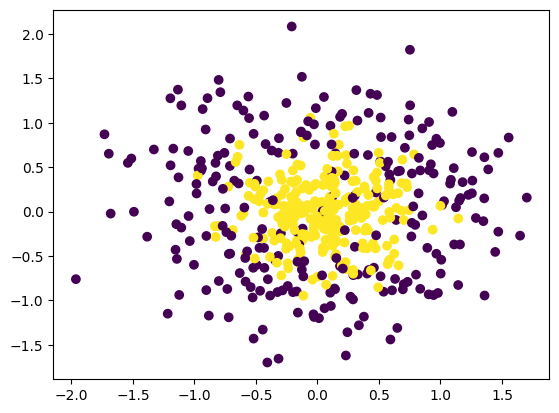

In [30]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)


In [33]:
from sklearn.linear_model import Perceptron
# Perceptron algorithm
perceptron = Perceptron()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit perceptron model
perceptron.fit(X_train, y_train)

# Evaluate perceptron accuracy
perceptron_score = perceptron.score(X_test, y_test)
print("Perceptron Accuracy:", perceptron_score)

Perceptron Accuracy: 0.46


In [36]:
# Code for adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [38]:
from sklearn.model_selection import GridSearchCV
# Grid search
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_result = grid_search.fit(X_train, y_train)

# Get the best model
best_adaboost = grid_result.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

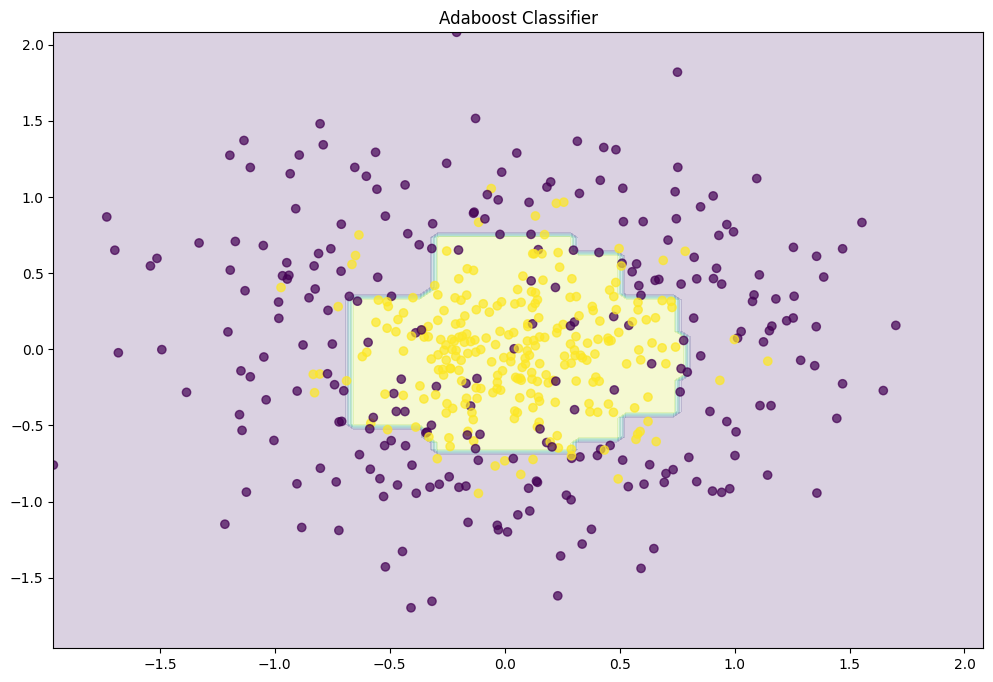

Best: 0.817500 using {'learning_rate': 0.1, 'n_estimators': 200}


In [39]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

# Call the fnction plot_decision_boundary()
plot_decision_boundary(best_adaboost)

# Summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [40]:
from sklearn.model_selection import GridSearchCV
# Complete the code to get the best score and best parameters

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # define grid_result from your side

Best: 0.817500 using {'learning_rate': 0.1, 'n_estimators': 200}


# **Task 5**

**5. You have to use different ML models to classify the Flowers from a common dataset iris. Models to be used are :- Logistic Regression, Support Vector Machine, KNN and Naive Bayes**

**Accuracy should be more than 90% in all the models. Also you have to do the filteration and data cleaning if required, this is a complete prediction model task.**

**Add some plots of the data to showcase your approach**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
iris = pd.read_csv('/content/Datasets-and-Images/Datasets and images/iris.csv')

In [43]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [44]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

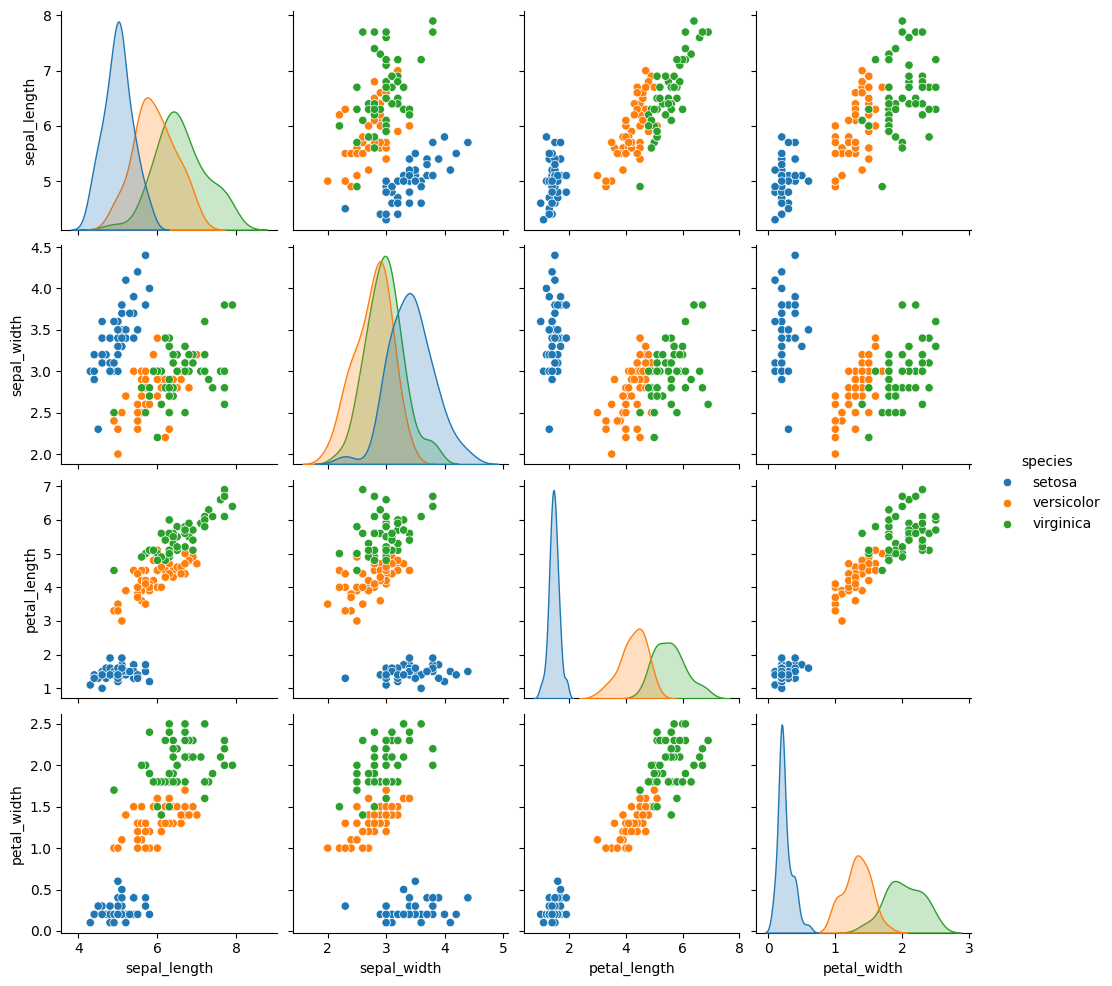

In [45]:

# Draw a pair plot for the species
sns.pairplot(iris, hue='species')
plt.show()


In [47]:
# Data preprocessing
X = iris.drop('species', axis=1)
y = iris['species']

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [48]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Logistic Regressoin Model**

In [53]:
# Use the Model, display accuracy score and Confusion matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Support Vector Machine**

In [50]:
  # Use the Model, display accuracy score
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)



SVM Accuracy: 1.0


**Use KNN**

In [51]:
# Use the Model, display accuracy score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 1.0


**Use Naive Bayes**

In [52]:
# Use the Model, display accuracy score
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 1.0


# **Task 6**

**You are given a dataset containing images of different animals (e.g., cats, dogs, birds). Your task is to build a convolutional neural network (CNN) model to classify these images into their respective categories.**

**You have to use CIFAR-10 dataset whose code is present below. You need to show the performce of your model after each epochs**

The output from one such model is present below using 10 epochs

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5246 - accuracy: 0.4433 - val_loss: 1.2150 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1443 - accuracy: 0.5935 - val_loss: 1.1200 - val_accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0058 - accuracy: 0.6453 - val_loss: 0.9858 - val_accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9135 - accuracy: 0.6815 - val_loss: 0.9607 - val_accuracy: 0.6646
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8436 - accuracy: 0.7062 - val_loss: 0.8995 - val_accuracy: 0.6865
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7845 - accuracy: 0.7272 - val_loss: 0.9159 - val_accuracy: 0.6892
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7355 - accuracy: 0.7444 - val_loss: 0.8803 -

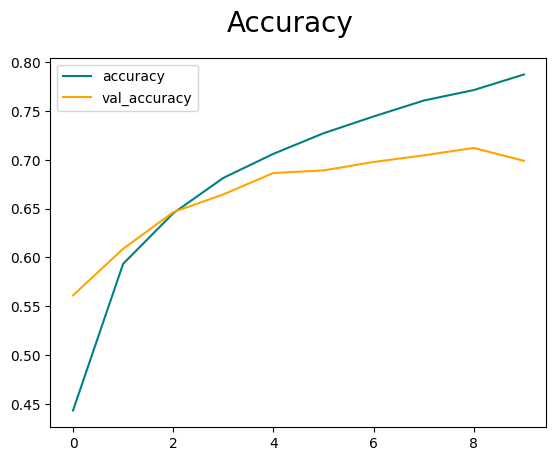

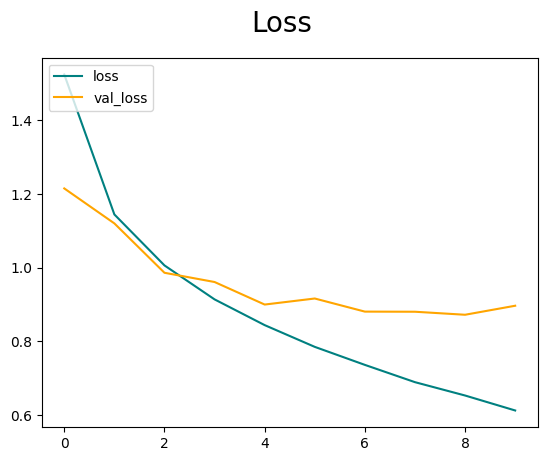

In [90]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define your architecture here
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile your model here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate your model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Task 7**

**You are given a dataset containing text reviews (e.g., movie reviews, product reviews). Your task is to build a recurrent neural network (RNN) model to perform sentiment analysis on these reviews, i.e., classify them into positive or negative sentiment categories.**

**You have to use imdb dataset whose code is present below. You need to show the performce of your model after each epochs**

**To refere about the RNN and sentiment analysis:-** https://www.tensorflow.org/tutorials/keras/text_classification

The output from one such model is present below using 5 epochs

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 16)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 180801 (706.25 KB)
Trainable params: 180801 (706.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
196/196 [==============================] - 132s 653ms/step - loss: 0.6927 - accuracy: 0.5084 - val_loss: 0.6916 - val_accuracy: 0.5356
Epoch 2/6
196/196 [==============================] - 127s 651ms/step - loss: 0.6691 - accuracy: 0.5738 - val_loss: 0.6156 - val_accur

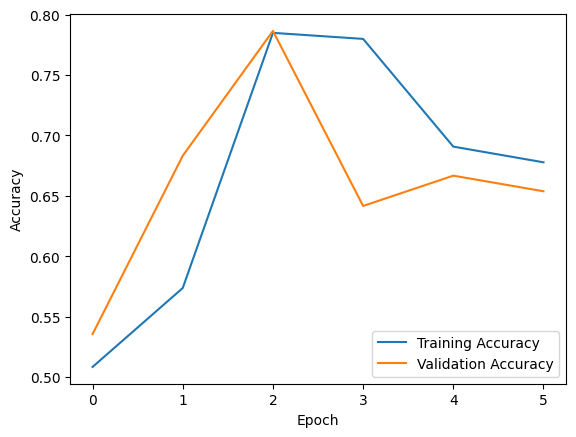

In [93]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb

# IMDb movie review dataset
num_words = 10000  # Number of most frequent words to keep
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
max_length = 256
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Define RNN architecture
embedding_dim = 16
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


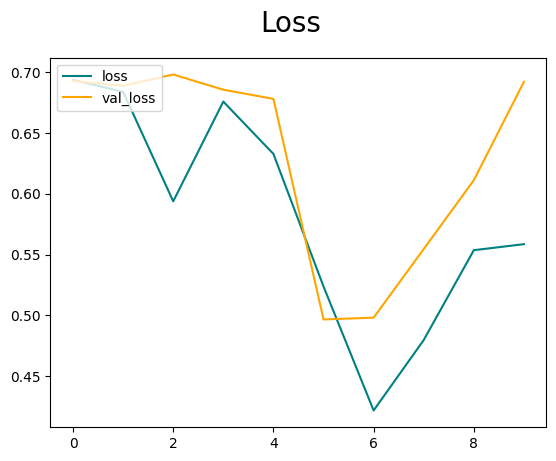

In [92]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()